# Description of Dataset

The dataset is a collection of social media comments, primarily sourced from platforms like Twitter. Each comment is annotated and classified into one of three categories based on the nature and intent of the language used:


**Structure of the Dataset**

The dataset is structured in tabular format with 24,783 rows and 2 columns, where each row represents a single social media comment. Here's a breakdown of the columns:

Columns:
label (Integer / Categorical):

Indicates the classification of the comment:

0 - Hate Speech: Comments that directly attack or express hatred toward a particular group based on attributes such as race, ethnicity, religion, gender, or sexual orientation. These are considered harmful and discriminatory.

1 - Offensive Language: Comments that include vulgar, rude, or profane language, but do not necessarily express hatred toward a specific group. These may be inappropriate or aggressive but lack the targeted intent found in hate speech.

2 - Neither: Comments that are neutral, harmless, or contain no offensive or hateful language. These are standard, non-toxic messages.

text (String):

Contains the actual comment or tweet as posted by the user.

May include hashtags, mentions, emojis, links, or informal language common on social media.


The dataset is now using for training machine learning models in natural language processing tasks related to content moderation, toxic speech detection, and online safety enforcement.

# Text Preprocessing, Tokenization, and Sequence Padding

## Loading Dataset

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/AI and ML/hatevsoffensive_language.csv') # CSV path of dataset

In [2]:
df

,label,text
0,neither,!!! RT @mayasolovely: As a woman you shouldn't...
1,offensive language,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,offensive language,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,offensive language,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,offensive language,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,offensive language,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,neither,"you've gone and broke the wrong heart baby, an..."
24780,offensive language,young buck wanna eat!!.. dat nigguh like I ain...
24781,offensive language,youu got wild bitches tellin you lies


In [3]:
# import matplotlib.pyplot as plt

# # Get length of each original text sequence
# text_lengths = [len(text.split()) for text in df['clean_text']]

# # Plot the histogram
# plt.figure(figsize=(10, 5))
# plt.hist(text_lengths, bins=30, color='skyblue', edgecolor='black')
# plt.title('Distribution of Text Lengths (before padding)')
# plt.xlabel('Number of Words')
# plt.ylabel('Number of Samples')
# plt.grid(True)
# plt.show()

**Label Encoding**

In [4]:
print(df['label'].unique())        # Shows unique label values
print(df['label'].value_counts())  # Shows how many of each label

['neither' 'offensive language' 'hate speec']
label
offensive language    19190
neither                4163
hate speec             1430
Name: count, dtype: int64


In [5]:
# Define label mapping
label_map = {
    'hate speec': 0,
    'offensive language': 1,
    'neither': 2
}

# Overwrite the original 'label' column
df['label'] = df['label'].map(label_map)

In [6]:
df

,label,text
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [7]:
print(df['label'].unique())        # Shows unique label values
print(df['label'].value_counts())  # Shows how many of each label

[2 1 0]
label
1    19190
2     4163
0     1430
Name: count, dtype: int64


##  Clean the text

**Lowercasing**

In [8]:
df['clean_text'] = df['text'].str.lower()

There may be require the original test column for the comparision or any other resuable task. so new column text_column is created and implementing the data preprocessing steps.

And the reason of converting all the text to lower case is for standarization, so words like "Hate" and "hate" are treated as the same word during analysis and this helps to improve accuracy in tasks like word frequency, tokenization, and model training.

In [9]:
df

,label,text,clean_text
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...
...,...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you's a muthaf***in lie &#8220;@lifeasking: @2...
24779,2,"you've gone and broke the wrong heart baby, an...","you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat!!.. dat nigguh like i ain...
24781,1,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies


There we can see the total number of rows and columns of the dataframe is 24783 and 3 columns respectively.

**Remove URLs, mentions, hashtags, numbers, special characters**

In [10]:
import re
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # URLs
    text = re.sub(r'\@\w+|\#', '', text)  # mentions and hashtags
    text = re.sub(r'\d+', '', text)  # numbers
    text = re.sub(r'[^\w\s]', '', text)  # special characters
    return text

df['clean_text'] = df['clean_text'].apply(clean_text)

Rrrelevant or distracting elements: This function cleans the text by removing unwanted noise parts like: URLs, Mention, (@username) and hashtags, Numbers, Special characters (like !, ?, #)

This makes the text cleaner and more useful for NLP tasks like sentiment or hate speech analysis.

In [11]:
df.head()

,label,text,clean_text
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt as a woman you shouldnt complain about cl...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt boy dats coldtyga dwn bad for cuffin dat ...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt dawg rt you ever fuck a bitch and she st...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt the shit you hear about me might be true ...


**Handle contractions**

In [12]:
!pip install contractions

In [13]:
import contractions
df['clean_text'] = df['clean_text'].apply(lambda x: contractions.fix(x))

This will expand contractions like "don't" → "do not", "I'm" → "I am", which helps improve text preprocessing for NLP tasks.  This is done to make the text clearer and more consistent.

The contractions.fix(x) is to expand contractions in each text entry of the 'clean_text' column using .apply() — which applies the function row by row across the column.

**Remove stopwords and apply lemmatization:**

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['clean_text'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NLTK stands for Natural Language Toolkit.

It’s a popular Python library used for natural language processing (NLP) tasks like:

Tokenization

Stopword removal

Lemmatization

Text classification

This code further cleans and simplifies the text by:

Removing stopwords (common words like "the", "is", "and" that add little meaning)

Lemmatizing (reducing words to their base form, e.g., "running" → "run")

This helps models focus on the most meaningful words for better analysis and predictions.

In [15]:
df.head()

,label,text,clean_text
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt woman complain cleaning house amp man alway...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt boy dat coldtyga dwn bad cuffin dat hoe st ...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt dawg rt ever fuck bitch start cry confused ...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shit hear might true might faker bitch told ya


## Visualize the cleaned data

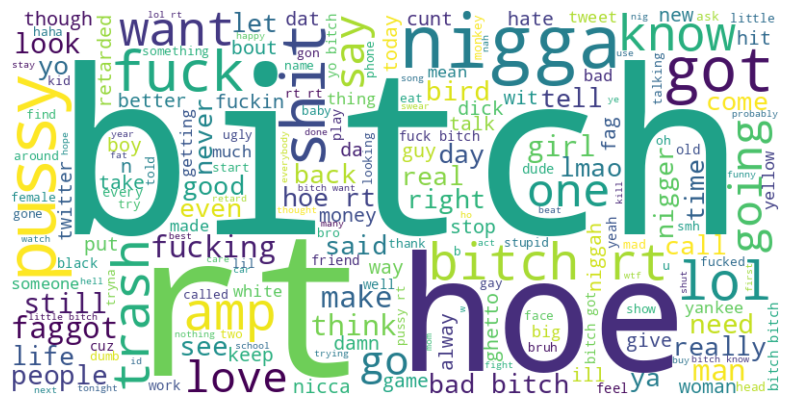

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The above is to create and display a word cloud, which is to visualize the most common words in the cleaned text.

where larger words like 'bitch', 'hoe', and 'nigga' appear more often in the text. This helps identify the most commonly used terms and overall themes in the comments."

Since this dataset is used for hate speech and offensive language detection, it's there in the above wordcloud, many common words are offensive. This actually proves that the data contains harmful language, which is what our model is meant to detect and handle.

##  Tokenization and Padding

**Train-test split (80/20)**

In [17]:
from sklearn.model_selection import train_test_split

# Step 1: Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

# Step 2: Further split the training data into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
X_train

,clean_text
14430,rt ugh white trash
8931,eat vegetable grow pussy
6700,queer gnarles charles
12764,maple room bitch sacto style
22856,black girl got thots nobody bringing fat white...
...,...
12620,lol freshman said dress baby retarded said wel...
10618,knew new orleans nig would say something crazy...
19791,rt cannot worried bout bitch bitch could somew...
5746,ho ho ho


**Tokenization:**

Tokenization is the process of converting text into numbers so that it can be understood by a machine learning model.

The tokenizer assigns a unique integer ID to each word.

This turns the comment/text into a sequence of numbers.

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [20]:
X_test_seq

[[7, 1472, 56, 24, 1],
 [2, 25, 30, 1, 139, 32, 78, 88, 766],
 [2, 13, 2029, 1345, 28, 15, 47, 31, 262, 121, 306, 54],
 [2, 2674, 1357, 34, 2, 1117, 13618, 21, 42, 11],
 [6, 451, 1, 826, 377, 43, 8855, 10371, 1],
 [466, 556, 354, 993, 106, 4769, 20, 131, 593, 1],
 [48, 4443, 1, 7, 36, 1822, 2663],
 [776, 22, 1],
 [660, 111, 104, 4, 1, 4355, 96],
 [2, 541, 1, 529, 14, 429, 660],
 [4, 1, 169, 2481, 2247],
 [1741, 202, 225, 1439, 120],
 [668, 1, 36, 302, 2180],
 [25, 317],
 [1, 691, 6, 158, 433, 185],
 [1556, 13153, 89, 314, 1],
 [7, 18, 182, 26, 1211, 1349, 1732],
 [842, 1292, 3, 333, 356, 937, 8, 31, 6],
 [68, 12891, 368, 11, 12890, 287, 1, 287],
 [12, 54],
 [2,
  720,
  604,
  88,
  1,
  55,
  231,
  144,
  12834,
  5951,
  762,
  5191,
  20,
  2840,
  1193,
  5,
  1310],
 [32, 17, 128, 218, 96, 1, 1284, 754, 3, 7029, 13],
 [2, 1466, 4860, 2570, 369, 281, 101, 327, 517, 73],
 [157, 6, 1389, 1640, 949, 69, 1215, 71, 1, 55, 9, 59, 29, 69, 6514],
 [3, 322],
 [227, 33, 647, 20, 6161, 2066,

**Padding**

Padding ensures that all sequences (lists of numbers) are of the same length, which is required by neural networks like RNNs and LSTMs.

So we make all sequences the same length by adding zeros (0) at the end.

In [21]:
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Determine suitable max length (e.g., 95th percentile)
lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(lengths, 95))

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [22]:
X_train_pad

array([[   2,  756,   51, ...,    0,    0,    0],
       [  82, 2863,  606, ...,    0,    0,    0],
       [ 317, 6346, 3410, ...,    0,    0,    0],
       ...,
       [   2,   21,  715, ...,    0,    0,    0],
       [ 121,  121,  121, ...,    0,    0,    0],
       [  19, 6335,  147, ...,  327,    0,    0]], dtype=int32)

#  Model Building

**Model 1: Simple RNN with Trainable Embedding**

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

vocab_size = len(tokenizer.word_index) + 1

model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size, output_dim=64))  # removed input_length
model1.add(SimpleRNN(64))
model1.add(Dense(3, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Now force model to build (optional but helpful for summary)
model1.build(input_shape=(None, X_train_pad.shape[1]))

model1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 14, 64)         │       964,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 973,379 (3.71 MB)

 Trainable params: 973,379 (3.71 MB)

 Non-trainable params: 0 (0.00 B)

**Model 2: LSTM with Trainable Embedding**

In [24]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Reuse your vocab_size
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=64))  # Removed input_length
model2.add(LSTM(64))
model2.add(Dense(3, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Force model to build (to see parameter count in summary)
model2.build(input_shape=(None, X_train_pad.shape[1]))

model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 14, 64)         │       964,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 998,147 (3.81 MB)

 Trainable params: 998,147 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
X_train_pad.shape

(15860, 14)

**Model 3: LSTM with Pretrained Word2Vec Embedding**

Load Pretrained Embedding

In [26]:
!pip install --upgrade numpy gensim

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


In [28]:
import gensim.downloader as api
embedding_model = api.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


Create Embedding Matrix

In [32]:
import numpy as np

embedding_dim = 50
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in embedding_model:
        embedding_matrix[i] = embedding_model[word]


Build the Model

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size,
                     output_dim=embedding_dim,
                     weights=[embedding_matrix],
                     trainable=False))  # Freeze embedding
model3.add(LSTM(64))
model3.add(Dense(3, activation='softmax'))

# Compile the model
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Force the model to build by specifying the input shape
model3.build(input_shape=(None, X_train_pad.shape[1]))

# Now print the model summary
model3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 14, 50)         │       753,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 783,485 (2.99 MB)

 Trainable params: 29,635 (115.76 KB)

 Non-trainable params: 753,850 (2.88 MB)

# Model Training

**Compile Models**

In [39]:
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Early stopping callback to stop training once validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model Compilation
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Train Model 1**

In [40]:
history1 = model1.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_val_pad, y_val), callbacks=[early_stopping])

Epoch 1/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9231 - loss: 0.2415 - val_accuracy: 0.8825 - val_loss: 0.3186
Epoch 2/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9606 - loss: 0.1202 - val_accuracy: 0.8762 - val_loss: 0.3747
Epoch 3/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9794 - loss: 0.0630 - val_accuracy: 0.8593 - val_loss: 0.4771
Epoch 4/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9875 - loss: 0.0379 - val_accuracy: 0.8606 - val_loss: 0.5201
Epoch 5/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9902 - loss: 0.0289 - val_accuracy: 0.8480 - val_loss: 0.5981
Epoch 6/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9921 - loss: 0.0251 - val_accuracy: 0.8482 - val_loss: 0.6441


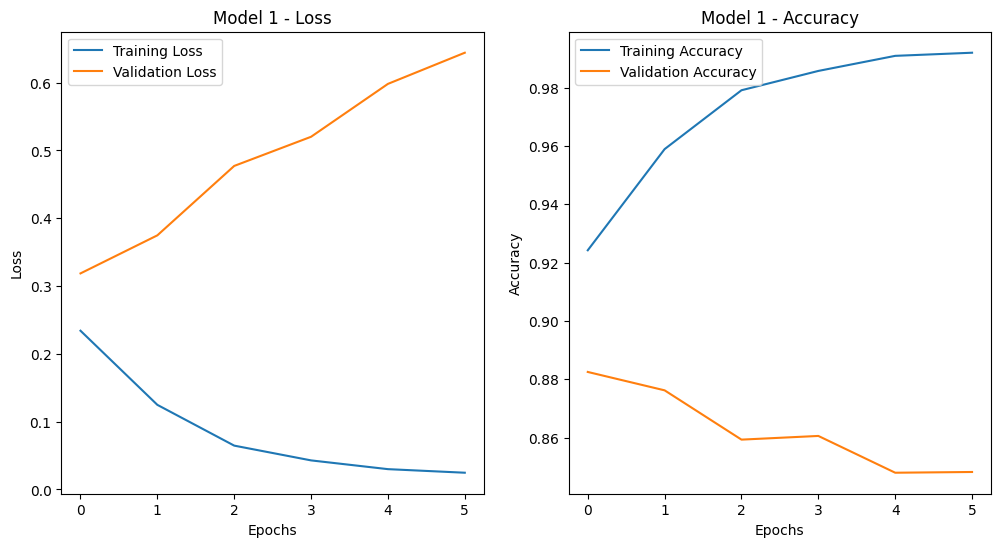

In [41]:
# Plotting function for Training vs Validation
def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Plot histories for all models
plot_history(history1, 'Model 1')

**Train Model 2**

In [42]:
history2 = model2.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_val_pad, y_val), callbacks=[early_stopping])

Epoch 1/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7998 - loss: 0.6069 - val_accuracy: 0.8883 - val_loss: 0.3221
Epoch 2/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9183 - loss: 0.2554 - val_accuracy: 0.8921 - val_loss: 0.3073
Epoch 3/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9451 - loss: 0.1811 - val_accuracy: 0.8896 - val_loss: 0.3240
Epoch 4/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9617 - loss: 0.1269 - val_accuracy: 0.8626 - val_loss: 0.4149
Epoch 5/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9710 - loss: 0.0907 - val_accuracy: 0.8724 - val_loss: 0.3923
Epoch 6/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9784 - loss: 0.0713 - val_accuracy: 0.8785 - val_loss: 0.4554
Epoch 7/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9809 - loss: 0.0586 - val_accuracy: 0.8782 - val_loss: 0.4942


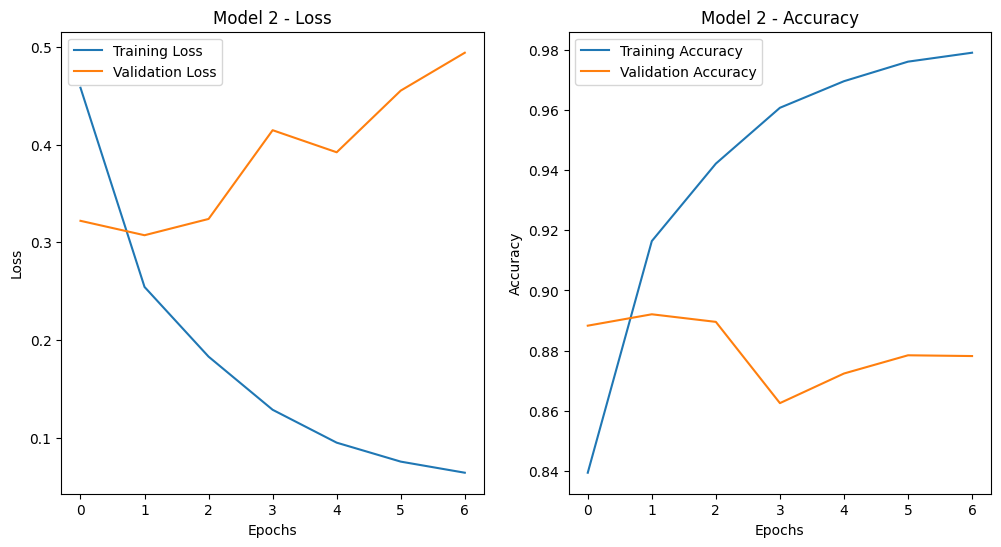

In [43]:
# Plotting function for Training vs Validation
def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Plot histories for all models
plot_history(history2, 'Model 2')

**Train Model 3**

In [44]:
history3 = model3.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_val_pad, y_val), callbacks=[early_stopping])

Epoch 1/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8107 - loss: 0.5850 - val_accuracy: 0.8538 - val_loss: 0.3990
Epoch 2/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8686 - loss: 0.3570 - val_accuracy: 0.8729 - val_loss: 0.3256
Epoch 3/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8839 - loss: 0.3073 - val_accuracy: 0.8833 - val_loss: 0.3016
Epoch 4/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8856 - loss: 0.2940 - val_accuracy: 0.8830 - val_loss: 0.2959
Epoch 5/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8932 - loss: 0.2751 - val_accuracy: 0.8848 - val_loss: 0.2924
Epoch 6/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8986 - loss: 0.2662 - val_accuracy: 0.8843 - val_loss: 0.3075
Epoch 7/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8991 - loss: 0.2573 - val_accuracy: 0.8810 - val_loss: 0.2892
Epoch 8/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9098 - loss: 0.2380 - val_accu

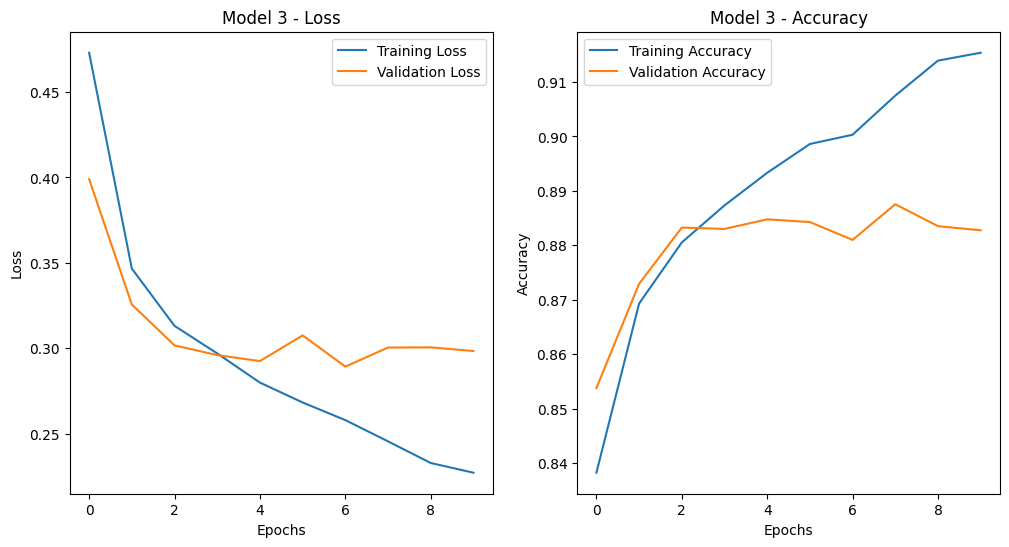

In [45]:
# Plotting function for Training vs Validation
def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Plot histories for all models
plot_history(history3, 'Model 3')

# Model Evaluation

In [47]:
# Evaluate Model 1
loss1, accuracy1 = model1.evaluate(X_test_pad, y_test)
y_pred1 = model1.predict(X_test_pad)
y_pred1 = y_pred1.argmax(axis=1)

print(f"Model 1 Accuracy: {accuracy1}")


155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8839 - loss: 0.3335
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 1 Accuracy: 0.8868266940116882


In [48]:
# Evaluate Model 2
loss2, accuracy2 = model2.evaluate(X_test_pad, y_test)
y_pred2 = model2.predict(X_test_pad)
y_pred2 = y_pred2.argmax(axis=1)
print(f"Model 2 Accuracy: {accuracy2}")


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8829 - loss: 0.3330
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Model 2 Accuracy: 0.8868266940116882


In [50]:
# Evaluate Model 3
loss3, accuracy3 = model3.evaluate(X_test_pad, y_test)
y_pred3 = model3.predict(X_test_pad)
y_pred3 = y_pred3.argmax(axis=1)
print(f"Model 3 Accuracy: {accuracy3}")

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8863 - loss: 0.2940
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Model 3 Accuracy: 0.881985068321228


# Performance evaluation

**Confusion Matrix**

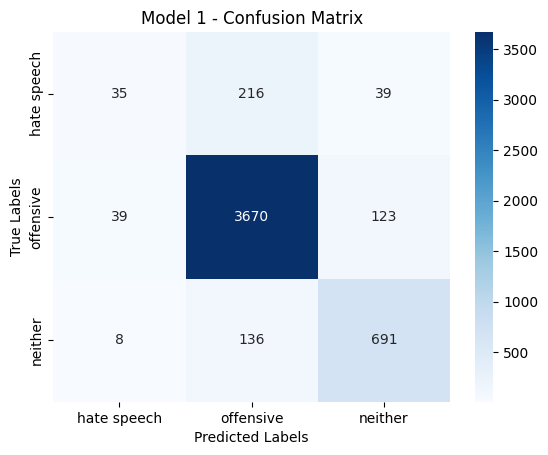

In [57]:
# Confusion Matrix for Model 1
conf_matrix1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=['hate speech', 'offensive', 'neither'], yticklabels=['hate speech', 'offensive', 'neither'])
plt.title("Model 1 - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

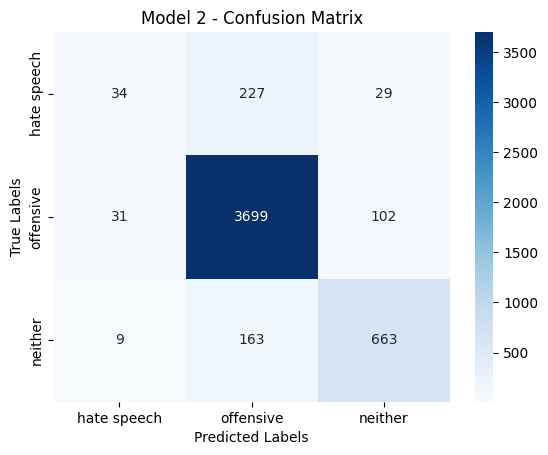

In [56]:
# Confusion Matrix for Model 2
conf_matrix2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['hate speech', 'offensive', 'neither'], yticklabels=['hate speech', 'offensive', 'neither'])
plt.title("Model 2 - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

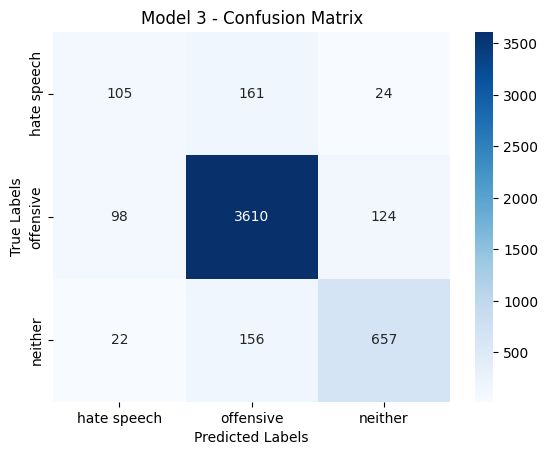

In [55]:
# Confusion Matrix for Model 3
conf_matrix3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=['hate speech', 'offensive', 'neither'], yticklabels=['hate speech', 'offensive', 'neither'])
plt.title("Model 3 - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**Classification Report**

In [58]:
# Classification Report for Model 1
print("Classification Report for Model 1:")
print(classification_report(y_test, y_pred1, target_names=['hate speech', 'offensive language', 'neither']))

Classification Report for Model 1:
                    precision    recall  f1-score   support

       hate speech       0.43      0.12      0.19       290
offensive language       0.91      0.96      0.93      3832
           neither       0.81      0.83      0.82       835

          accuracy                           0.89      4957
         macro avg       0.72      0.64      0.65      4957
      weighted avg       0.87      0.89      0.87      4957



In [59]:
# Classification Report for Model 2
print("Classification Report for Model 2:")
print(classification_report(y_test, y_pred2, target_names=['hate speech', 'offensive language', 'neither']))

Classification Report for Model 2:
                    precision    recall  f1-score   support

       hate speech       0.46      0.12      0.19       290
offensive language       0.90      0.97      0.93      3832
           neither       0.84      0.79      0.81       835

          accuracy                           0.89      4957
         macro avg       0.73      0.63      0.64      4957
      weighted avg       0.87      0.89      0.87      4957



In [60]:
# Classification Report for Model 3
print("Classification Report for Model 3:")
print(classification_report(y_test, y_pred3, target_names=['hate speech', 'offensive language', 'neither']))

Classification Report for Model 3:
                    precision    recall  f1-score   support

       hate speech       0.47      0.36      0.41       290
offensive language       0.92      0.94      0.93      3832
           neither       0.82      0.79      0.80       835

          accuracy                           0.88      4957
         macro avg       0.73      0.70      0.71      4957
      weighted avg       0.88      0.88      0.88      4957



In [63]:
# Save the entire model
model3.save('model.h5')

# GUI for Real Time Prediction

In [67]:
import pickle

with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [81]:
with open('tokenizer.pkl', 'rb') as handle:
    tokenizer_loaded = pickle.load(handle)
print(tokenizer_loaded.word_index['gone'])  # Example to confirm

139
